In [57]:
import pandas as pd
import requests
import folium
import networkx as nx
import json
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/DatathonUCI_Addresses.csv')

In [ ]:
data.dtypes

,0
RecordID,int64
Address,object
City,object
State,object
Zip,int64


In [ ]:
data.head()

,RecordID,Address,City,State,Zip
0,1,515 E Peltason Dr,Irvine,CA,92617
1,2,4 Alcott Ct,Irvine,CA,92617
2,3,16 Joyce Ct,Irvine,CA,92617
3,4,11 Murasaki St,Irvine,CA,92617
4,5,10 Whistler Ct,Irvine,CA,92617


In [ ]:
def verify_address(address_line, city, state, zip_code, api_key):
    url = 'https://address.melissadata.net/v3/WEB/GlobalAddress/doGlobalAddress'
    params = {
        't': 'your_transaction_key',
        'id': api_key,
        'act': 'Check',
        'format': 'json',
        'a1': address_line,
        'a2': city,
        'a3': state,
        'a4': zip_code
    }
    response = requests.get(url, params=params)
    return response.json()

For this code, try to add
1. a check that says whether or not we extracted the data for a certain row
2. We will burn through all of the credits before we go through all the entries so save the data that we have so far as a .csv file so we don't lose our progress

In [ ]:
def enrich_demographics(address, api_key):
    url = 'https://api.melissa.com/v3/WEB/Personator'
    params = {
        't': 'your_transaction_key',
        'id': api_key,
        'act': 'Check',
        'format': 'json',
        'address': address

    }
    response = requests.get(url, params=params)
    return response.json()

In [ ]:
import pandas as pd
import requests

def extract_demographics_by_mak(mak, license_key, transaction_key):
    """
    Query the Melissa Personator API using a given MAK to retrieve demographic data.
    Returns the JSON response for the record.
    """
    # Use the correct endpoint for ContactVerify with discrete inputs (including MAK)
    url = "https://personator.melissadata.net/v3/WEB/ContactVerify/doContactVerify"

    # Set up parameters as required by the API
    params = {
        "id": license_key,                # Your Customer ID (license key)
        "t": transaction_key,             # Your transaction key
        "act": "Check",                   # Action: Check validates and appends data
        "RecordID": "1",                  # A unique record identifier (here set to "1")
        "mak": mak,                       # The Melissa Address Key to identify the address
        "opt": "Demographics:Yes",        # Request that demographic data be appended
        "cols": "GrpDemographicBasic",    # Request basic demographic fields
        "format": "json"                  # Get the response in JSON format
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an error for HTTP errors
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error calling API for MAK {mak}: {e}")
        return None

# Replace these with your actual credentials
license_key = "RhTL2zZLLdQgaRltmlPUdV**nSAcwXpxhQ0PC2lXxuDAZ-**"
transaction_key = "your_transaction_key"
extract_demographics_by_mak(1734132018, license_key, transaction_key)

# # Read the CSV file that contains the MAK values
# df_mak = pd.read_csv("Melissa_Lookup_Results.csv")

# # Assume the MAK values are in a column named 'MelissaAddressKey'
# mak_values = df_mak["MelissaAddressKey"]

# # List to store enriched demographic data for each record
# results_list = []

# # Loop over each MAK value to fetch demographic enrichment
# for index, mak in mak_values.iteritems():
#     result = extract_demographics_by_mak(mak, license_key, transaction_key)
#     if result and result.get("Records"):
#         # Get the first record from the response (since we're processing one record per call)
#         demographics_info = result["Records"][0]
#         # Optionally, include the input MAK in the results for reference
#         demographics_info["InputMAK"] = mak
#         results_list.append(demographics_info)
#     else:
#         print(f"No data returned for MAK {mak}")

# # Convert the list of enriched records to a pandas DataFrame
# df_results = pd.DataFrame(results_list)

# # Save the enriched results to a CSV file
# df_results.to_csv("Enriched_Demographics.csv", index=False)
# print("Enriched demographics data saved to Enriched_Demographics.csv")

{'Records': [{'AddressDeliveryInstallation': ' ',
   'AddressExtras': ' ',
   'AddressHouseNumber': ' ',
   'AddressKey': ' ',
   'AddressLine1': ' ',
   'AddressLine2': ' ',
   'AddressLockBox': ' ',
   'AddressPostDirection': ' ',
   'AddressPreDirection': ' ',
   'AddressPrivateMailboxName': ' ',
   'AddressPrivateMailboxRange': ' ',
   'AddressRouteService': ' ',
   'AddressStreetName': ' ',
   'AddressStreetSuffix': ' ',
   'AddressSuiteName': ' ',
   'AddressSuiteNumber': ' ',
   'AddressTypeCode': ' ',
   'AreaCode': ' ',
   'CBSACode': ' ',
   'CBSADivisionCode': ' ',
   'CBSADivisionLevel': ' ',
   'CBSADivisionTitle': ' ',
   'CBSALevel': ' ',
   'CBSATitle': ' ',
   'CarrierRoute': ' ',
   'CensusBlock': ' ',
   'CensusKey': ' ',
   'CensusTract': ' ',
   'ChildrenAgeRange': ' ',
   'City': ' ',
   'CityAbbreviation': ' ',
   'CompanyName': ' ',
   'CongressionalDistrict': ' ',
   'CountryCode': ' ',
   'CountryName': ' ',
   'CountyFIPS': ' ',
   'CountyName': ' ',
   'Coun

In [ ]:
import requests

# Melissa API credentials (replace with your actual values)
customer_id = "RhTL2zZLLdQgaRltmlPUdV**nSAcwXpxhQ0PC2lXxuDAZ-**"        # Your Melissa Customer ID (License Key)
# If a separate transaction/access key is provided, include it as needed (e.g., transaction_key = "YOUR_KEY")

# Base URL for the Personator Consumer API (ContactVerify endpoint)
base_url = "https://personator.melissadata.net/v3/WEB/ContactVerify/doContactVerify"

# Example list of Melissa Address Keys to enrich (use your actual MAK values here)
address_keys = ["1234567890"]  # e.g., a 10-digit MAK for an address

for mak in address_keys:
    # Set up query parameters for the API call
    params = {
        "id": customer_id,        # Melissa Customer ID (license key) for authentication
        "act": "Check",           # Action = Check (validate and enrich the address data)
        "cols": "GrpDemographicBasic",  # Request basic demographic fields group
        "mak": mak,               # The Melissa Address Key for the address we want to enrich
        "format": "JSON"          # Get response in JSON format
    }

    # Make the GET request to the Personator API
    response = requests.get(base_url, params=params)

    # Parse the JSON response
    data = response.json()

    # Extract the demographic info for this record (first record in response)
    if data.get("Records"):
        record = data["Records"][0]
        # Example: print some key demographic fields
        print(f"Address MAK: {mak}")
        print("Household Income:", record.get("HouseholdIncome"))
        print("Household Size:", record.get("HouseholdSize"))
        print("Presence of Children:", record.get("PresenceOfChildren"))
        print("Presence of Senior:", record.get("PresenceOfSenior"))
        print("Marital Status:", record.get("MaritalStatus"))
        print("Length of Residence:", record.get("LengthOfResidence"))
        print("----")
    else:
        print(f"No data returned for MAK {mak}")


In [ ]:
enrich_demographics('29 Murasaki St', "RhTL2zZLLdQgaRltmlPUdV**nSAcwXpxhQ0PC2lXxuDAZ-**")

{'Records': [{'AddressDeliveryInstallation': ' ',
   'AddressExtras': ' ',
   'AddressHouseNumber': ' ',
   'AddressKey': ' ',
   'AddressLine1': ' ',
   'AddressLine2': ' ',
   'AddressLockBox': ' ',
   'AddressPostDirection': ' ',
   'AddressPreDirection': ' ',
   'AddressPrivateMailboxName': ' ',
   'AddressPrivateMailboxRange': ' ',
   'AddressRouteService': ' ',
   'AddressStreetName': ' ',
   'AddressStreetSuffix': ' ',
   'AddressSuiteName': ' ',
   'AddressSuiteNumber': ' ',
   'AddressTypeCode': ' ',
   'AreaCode': ' ',
   'CBSACode': ' ',
   'CBSADivisionCode': ' ',
   'CBSADivisionLevel': ' ',
   'CBSADivisionTitle': ' ',
   'CBSALevel': ' ',
   'CBSATitle': ' ',
   'CarrierRoute': ' ',
   'CensusBlock': ' ',
   'CensusKey': ' ',
   'CensusTract': ' ',
   'ChildrenAgeRange': ' ',
   'City': ' ',
   'CityAbbreviation': ' ',
   'CompanyName': ' ',
   'CongressionalDistrict': ' ',
   'CountryCode': ' ',
   'CountryName': ' ',
   'CountyFIPS': ' ',
   'CountyName': ' ',
   'Coun

In [ ]:
for idx, row in data.iterrows():
    # Verify and standardize address
    result = verify_address(row['address'], row['city'], row['state'], row['zip'], API_KEY)
    try:
        record = result['records'][0]
        data.at[idx, 'MAK'] = record.get('mak')
        data.at[idx, 'Standardized'] = record.get('std_address')
        data.at[idx, 'Classification'] = record.get('residentialIndicator')
    except (IndexError, KeyError):
        print(f"Verification failed for index {idx}")

    # Geocode using the standardized address if available
    std_address = data.at[idx, 'Standardized']
    if std_address:
        result_geo = geocode_address(std_address, API_KEY)
        try:
            geo_record = result_geo['records'][0]
            data.at[idx, 'Latitude'] = geo_record.get('latitude')
            data.at[idx, 'Longitude'] = geo_record.get('longitude')
            data.at[idx, 'CensusTract'] = geo_record.get('census_tract')
        except (IndexError, KeyError):
            print(f"Geocoding failed for index {idx}")

    # Enrich with demographic data using the standardized address
    if std_address:
        result_demo = enrich_demographics(std_address, API_KEY)
        try:
            demo_record = result_demo['records'][0]
            data.at[idx, 'IncomeRange'] = demo_record.get('income_range')
            data.at[idx, 'HomeownerStatus'] = demo_record.get('homeowner_status')
        except (IndexError, KeyError):
            print(f"Demographic enrichment failed for index {idx}")

KeyError: 'address'

In [ ]:
print("Updated dataset with enriched data:")
print(data.head())
data.to_csv('Full_Enriched_Dataset.csv', index=False)
print("Final dataset saved as 'Full_Enriched_Dataset.csv'.")

Updated dataset with enriched data:
   RecordID            Address    City State    Zip
0         1  515 E Peltason Dr  Irvine    CA  92617
1         2        4 Alcott Ct  Irvine    CA  92617
2         3        16 Joyce Ct  Irvine    CA  92617
3         4     11 Murasaki St  Irvine    CA  92617
4         5     10 Whistler Ct  Irvine    CA  92617
Final dataset saved as 'Full_Enriched_Dataset.csv'.


In [ ]:
verify_address('515 E Peltason Dr', 'Irvine', 'CA', 92617, "jVNqJpvWBnsX_HjGjnfIKX**nSAcwXpxhQ0PC2lXxuDAZ-**")

{'Version': '9.4.1.1205',
 'TransmissionReference': 'your_transaction_key',
 'TransmissionResults': '',
 'TotalRecords': '1',
 'Records': [{'RecordID': '1',
   'Results': 'AC16,AV24,GS05',
   'FormattedAddress': '515 E Peltason Dr;Irvine CA  92617-5503',
   'Organization': '',
   'AddressLine1': '515 E Peltason Dr',
   'AddressLine2': 'Irvine CA  92617-5503',
   'AddressLine3': '',
   'AddressLine4': '',
   'AddressLine5': '',
   'AddressLine6': '',
   'AddressLine7': '',
   'AddressLine8': '',
   'SubPremises': '',
   'DoubleDependentLocality': '',
   'DependentLocality': '',
   'Locality': 'Irvine',
   'SubAdministrativeArea': 'Orange',
   'AdministrativeArea': 'CA',
   'PostalCode': '92617-5503',
   'PostalCodeType': '',
   'AddressType': 'S',
   'AddressKey': '92617550315',
   'SubNationalArea': '',
   'CountryName': 'United States of America',
   'CountryISO3166_1_Alpha2': 'US',
   'CountryISO3166_1_Alpha3': 'USA',
   'CountryISO3166_1_Numeric': '840',
   'CountrySubdivisionCode':

In [ ]:
import pandas as pd
import requests
import time

def verify_address(address_line, city, state, zip_code, api_key):
    url = 'https://address.melissadata.net/v3/WEB/GlobalAddress/doGlobalAddress'
    params = {
        't': 'your_transaction_key',  # Replace with your transaction key
        'id': api_key,
        'act': 'Check',
        'format': 'json',
        'a1': address_line,
        'a2': city,
        'a3': state,
        'a4': zip_code
    }
    # Send request and check for rate limiting
    response = requests.get(url, params=params)
    # If rate limited, wait and then try once more
    if response.status_code == 429:
        print("Rate limit hit. Waiting 1 second.")
        time.sleep(1)
        response = requests.get(url, params=params)
    try:
        return response.json()
    except Exception as e:
        print("JSON decode error:", e)
        print("Response Text:", response.text)
        return None

# Load CSV file
data = pd.read_csv('DatathonUCI_Addresses.csv')

# Create new columns in the DataFrame
data['FormattedAddress'] = None
data['Latitude'] = None
data['Longitude'] = None
data['MelissaAddressKey'] = None

API_KEY = "jVNqJpvWBnsX_HjGjnfIKX**nSAcwXpxhQ0PC2lXxuDAZ-**"

# Loop through each record in the dataset
for idx, row in data.iterrows():
    result = verify_address(row['Address'], row['City'], row['State'], row['Zip'], API_KEY)
    if result is None or 'Records' not in result:
        print(f"Data not available for row {idx}")
    else:
        try:
            record = result['Records'][0]
            data.at[idx, 'FormattedAddress'] = record.get('FormattedAddress')
            data.at[idx, 'Latitude'] = record.get('Latitude')
            data.at[idx, 'Longitude'] = record.get('Longitude')
            data.at[idx, 'MelissaAddressKey'] = record.get('MelissaAddressKey')
        except (IndexError, KeyError) as e:
            print(f"Error processing row {idx}: {e}")
    # Pause between requests to avoid rate limiting
    time.sleep(1)

# Save the enriched DataFrame to a new CSV file
data.to_csv('Full_Enriched_Dataset.csv', index=False)


Error processing row 40: list index out of range
Data not available for row 41
Error processing row 42: list index out of range
Error processing row 43: list index out of range
JSON decode error: Expecting value: line 1 column 1 (char 0)
Response Text: <html>
	<head>
		<title>401 Unauthorized</title>
	</head>
	<body>
		<h1>Unauthorized</h1>
		<p>CustomerID is invalid</p>
	</body>
</html>
Data not available for row 44
JSON decode error: Expecting value: line 1 column 1 (char 0)
Response Text: <html>
	<head>
		<title>401 Unauthorized</title>
	</head>
	<body>
		<h1>Unauthorized</h1>
		<p>CustomerID is invalid</p>
	</body>
</html>
Data not available for row 45
JSON decode error: Expecting value: line 1 column 1 (char 0)
Response Text: <html>
	<head>
		<title>401 Unauthorized</title>
	</head>
	<body>
		<h1>Unauthorized</h1>
		<p>CustomerID is invalid</p>
	</body>
</html>
Data not available for row 46
JSON decode error: Expecting value: line 1 column 1 (char 0)
Response Text: <html>
	<head>


SSLError: HTTPSConnectionPool(host='address.melissadata.net', port=443): Max retries exceeded with url: /v3/WEB/GlobalAddress/doGlobalAddress?t=your_transaction_key&id=jVNqJpvWBnsX_HjGjnfIKX%2A%2AnSAcwXpxhQ0PC2lXxuDAZ-%2A%2A&act=Check&format=json&a1=10+Zola+Ct&a2=Irvine&a3=CA&a4=92617 (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:1016)')))

In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 38.4 MB/s eta 0:00:00


In [ ]:
import re
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Load addresses from CSV
data_file = r"C:\Users\Admin\Documents\DatathonUCI_Addresses.csv"
df = pd.read_csv(data_file)

service = Service(r"C:\Users\Admin\Documents\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)

url = "https://lookups.melissa.com/home/addresscheck/address/"
driver.get(url)
print("A browser window has opened for Address Check. Please sign in manually within the next 30 seconds.")
time.sleep(30)  # Adjust the time if needed

results = []

for index, row in df.iterrows():
    address_input = row['Address'] + ", Irvine, CA"

    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))

    try:
        # Locate the search box by its ID "address"
        search_box = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "address"))
        )
        print(f"Index {index}: Address Check search box found.")
    except Exception as e:
        print(f"Index {index}: Could not locate address check search box: {e}")
        continue

    search_box.clear()
    search_box.send_keys(address_input)
    print(f"Index {index}: Entered '{address_input}' into search box.")

    try:
        submit_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//input[@type='submit' and @value='Submit']"))
        )
        submit_button.click()
        print(f"Index {index}: Submit button clicked.")
    except Exception as e:
        print(f"Index {index}: Could not click submit button: {e}")
        continue

    time.sleep(3)

    try:
        # Extract Address Type
        try:
            address_type = driver.find_element(
                By.XPATH, "//td[text()='Address Type']/following-sibling::td"
            ).text
            print(f"Index {index}: Address Type found: {address_type}")
        except Exception as e:
            address_type = ""
            print(f"Index {index}: Address Type not found: {e}")

        # Extract Lat & Long using the <b> element within the latlong cell
        try:
            latlong_text = driver.find_element(
                By.XPATH, "//td[normalize-space(text())='Lat. & Long.']/following-sibling::td/b"
            ).text.strip()
            match = re.search(r'([\-\d\.]+)\s+([\-\d\.]+)', latlong_text)
            if match:
                latitude = match.group(1)
                longitude = match.group(2)
                print(f"Index {index}: Lat/Long found: {latitude}, {longitude}")
            else:
                latitude = ""
                longitude = ""
                print(f"Index {index}: Could not parse Lat/Long from '{latlong_text}'")
        except Exception as e:
            latitude = ""
            longitude = ""
            print(f"Index {index}: Error extracting Lat/Long: {e}")

        results.append({
            "Address": address_input,
            "Address Type": address_type,
            "Lat": latitude,
            "Long": longitude
        })
        print(f"Index {index}: Data collected.\n")
    except Exception as e:
        print(f"Index {index} extraction error: {e}\n")
        results.append({
            "Address": address_input,
            "Address Type": None,
            "Lat": None,
            "Long": None
        })

driver.quit()

df_out = pd.DataFrame(results)
df_out.to_csv("Melissa_AddressCheck_WithLatLong.csv", index=False)
print("Done. Check 'Melissa_AddressCheck_WithLatLong.csv' for data.")

In [ ]:
import re
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Load addresses from CSV
data_file = r"C:\Users\Admin\Documents\DatathonUCI_Addresses.csv"
df = pd.read_csv(data_file)

service = Service(r"C:\Users\Admin\Documents\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)

url = "https://lookups.melissa.com/home/addresscheck/address/"
driver.get(url)
print("A browser window has opened for Address Check. Please sign in manually within the next 30 seconds.")
time.sleep(30)  # Adjust the time if needed

results = []

for index, row in df.iterrows():
    address_input = row['Address'] + ", Irvine, CA"

    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))

    try:
        # Locate the search box by its ID "address"
        search_box = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "address"))
        )
        print(f"Index {index}: Address Check search box found.")
    except Exception as e:
        print(f"Index {index}: Could not locate address check search box: {e}")
        continue

    search_box.clear()
    search_box.send_keys(address_input)
    print(f"Index {index}: Entered '{address_input}' into search box.")

    try:
        submit_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//input[@type='submit' and @value='Submit']"))
        )
        submit_button.click()
        print(f"Index {index}: Submit button clicked.")
    except Exception as e:
        print(f"Index {index}: Could not click submit button: {e}")
        continue

    time.sleep(3)

    try:
        # Extract Address Type
        try:
            address_type = driver.find_element(
                By.XPATH, "//td[text()='Address Type']/following-sibling::td"
            ).text
            print(f"Index {index}: Address Type found: {address_type}")
        except Exception as e:
            address_type = ""
            print(f"Index {index}: Address Type not found: {e}")

        # Extract Lat & Long using the <b> element within the latlong cell
        try:
            latlong_text = driver.find_element(
                By.XPATH, "//tr[td[normalize-space()='Lat. & Long.']]/td[@class='text-left']/b"
            ).text.strip()
            match = re.search(r'([\-\d\.]+)\s+([\-\d\.]+)', latlong_text)
            if match:
                latitude = match.group(1)
                longitude = match.group(2)
                print(f"Index {index}: Lat/Long found: {latitude}, {longitude}")
            else:
                latitude = ""
                longitude = ""
                print(f"Index {index}: Could not parse Lat/Long from '{latlong_text}'")
        except Exception as e:
            latitude = ""
            longitude = ""
            print(f"Index {index}: Error extracting Lat/Long: {e}")

        results.append({
            "Address": address_input,
            "Address Type": address_type,
            "Lat": latitude,
            "Long": longitude
        })
        print(f"Index {index}: Data collected.\n")
    except Exception as e:
        print(f"Index {index} extraction error: {e}\n")
        results.append({
            "Address": address_input,
            "Address Type": None,
            "Lat": None,
            "Long": None
        })

driver.quit()

df_out = pd.DataFrame(results)
df_out.to_csv("Melissa_AddressCheck_WithLatLong.csv", index=False)
print("Done. Check 'Melissa_AddressCheck_WithLatLong.csv' for data.")

In [27]:
df = pd.read_csv("Melissa_Final_Merge.csv")
df.head()

,Address,MAK,MIK,Children Age Range,Length of Residence,Address Type,Lat,Long,Household Income
0,"515 E Peltason Dr, Irvine, CA",1734132018,1.057273e+10,16-17,1-2 years,Residential,33.642963,-117.836463,"$40,001-$50,000"
1,"4 Alcott Ct, Irvine, CA",9933525478,1.026704e+10,NaN,15+ years,Residential,33.640275,-117.841219,"$40,001-$50,000"
2,"16 Joyce Ct, Irvine, CA",5077460919,1.017561e+10,NaN,15+ years,Residential,33.634868,-117.841251,"$60,001-$75,000"
3,"11 Murasaki St, Irvine, CA",9987920127,1.025388e+10,16-17,15+ years,Residential,33.640608,-117.835352,"$40,001-$50,000"
4,"10 Whistler Ct, Irvine, CA",5154333585,1.037076e+10,16-17,15+ years,Residential,33.635299,-117.840373,"$60,001-$75,000"


In [36]:
def convert_income_range(income_range_str):
    if pd.isnull(income_range_str):
        return np.nan
    # Remove currency symbols and commas.
    clean_str = re.sub(r'[\$,]', '', income_range_str.strip())
    parts = clean_str.split('-')
    if len(parts) == 2:
        try:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        except:
            return np.nan
    else:
        return np.nan

# Apply the function and create a new column.
df['household_income_numeric'] = df['Household Income'].apply(convert_income_range)

In [52]:
df.head()

,Address,MAK,MIK,Children Age Range,Length of Residence,Address Type,Lat,Long,Household Income,household_income_numeric,avg_children_age,length_of_residence_numeric,income_category
0,"515 E Peltason Dr, Irvine, CA",1734132018,1.057273e+10,16-17,1-2 years,Residential,33.642963,-117.836463,"$40,001-$50,000",45000.5,16.5,1.5,low
1,"4 Alcott Ct, Irvine, CA",9933525478,1.026704e+10,NaN,15+ years,Residential,33.640275,-117.841219,"$40,001-$50,000",45000.5,NaN,15.0,low
2,"16 Joyce Ct, Irvine, CA",5077460919,1.017561e+10,NaN,15+ years,Residential,33.634868,-117.841251,"$60,001-$75,000",67500.5,NaN,15.0,medium
3,"11 Murasaki St, Irvine, CA",9987920127,1.025388e+10,16-17,15+ years,Residential,33.640608,-117.835352,"$40,001-$50,000",45000.5,16.5,15.0,low
4,"10 Whistler Ct, Irvine, CA",5154333585,1.037076e+10,16-17,15+ years,Residential,33.635299,-117.840373,"$60,001-$75,000",67500.5,16.5,15.0,medium


In [31]:
df.head()

,Address,MAK,MIK,Children Age Range,Length of Residence,Address Type,Lat,Long,Household Income,children_age_16_17,children_age_6_10,children_age_11_15,children_age_0_2,children_age_3_5,length_of_residence_numeric
0,"515 E Peltason Dr, Irvine, CA",1734132018,1.057273e+10,16-17,1-2 years,Residential,33.642963,-117.836463,"$40,001-$50,000",1,0,0,0,0,1.5
1,"4 Alcott Ct, Irvine, CA",9933525478,1.026704e+10,NaN,15+ years,Residential,33.640275,-117.841219,"$40,001-$50,000",0,0,0,0,0,15.0
2,"16 Joyce Ct, Irvine, CA",5077460919,1.017561e+10,NaN,15+ years,Residential,33.634868,-117.841251,"$60,001-$75,000",0,0,0,0,0,15.0
3,"11 Murasaki St, Irvine, CA",9987920127,1.025388e+10,16-17,15+ years,Residential,33.640608,-117.835352,"$40,001-$50,000",1,0,0,0,0,15.0
4,"10 Whistler Ct, Irvine, CA",5154333585,1.037076e+10,16-17,15+ years,Residential,33.635299,-117.840373,"$60,001-$75,000",1,0,0,0,0,15.0


In [32]:
columns_to_drop = [col for col in df.columns if col.startswith("children_age_")]

# Drop these columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Print remaining columns to verify removal
print(df.columns)

Index(['Address', 'MAK', 'MIK', 'Children Age Range', 'Length of Residence',
       'Address Type', 'Lat', 'Long', 'Household Income',
       'length_of_residence_numeric'],
      dtype='object')


In [33]:
def compute_average_children_age(age_range_str):
    if pd.isnull(age_range_str) or age_range_str.strip() == "":
        return np.nan
    # Split the string by comma in case there are multiple ranges
    ranges = age_range_str.split(',')
    midpoints = []
    for r in ranges:
        r = r.strip()
        # Extract numeric lower and upper bounds for ranges like "0-2"
        match = re.match(r'(\d+)\s*-\s*(\d+)', r)
        if match:
            lower = float(match.group(1))
            upper = float(match.group(2))
            midpoint = (lower + upper) / 2
            midpoints.append(midpoint)
        else:
            # Handle single numeric values if present
            try:
                midpoints.append(float(r))
            except ValueError:
                continue
    if midpoints:
        return np.mean(midpoints)
    else:
        return np.nan

# Create a new numeric variable for the average children age
df['avg_children_age'] = df['Children Age Range'].apply(compute_average_children_age)

# Display the first few rows to verify the new column
print(df[['Children Age Range', 'avg_children_age']].head())

  Children Age Range  avg_children_age
0              16-17              16.5
1                NaN               NaN
2                NaN               NaN
3              16-17              16.5
4              16-17              16.5


In [34]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

def statistical_tests(df, categorical_columns, numerical_columns, income_column="household_income_numeric", alpha=0.05):
    # Split Household Income into 3 quantile categories.
    df["income_category"] = pd.qcut(df[income_column], q=3, labels=["low", "medium", "high"])

    categorical_results = []
    numerical_results = []
    cat_p_values = []
    num_p_values = []

    # Chi-square tests for categorical variables.
    for col in categorical_columns:
        if col not in df.columns:
            continue
        contingency_table = pd.crosstab(df[col], df["income_category"])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        categorical_results.append({
            "Variable": col,
            "Test": "Chi-Square",
            "Statistic": chi2,
            "P-value": p
        })
        cat_p_values.append(p)

    # Correct for multiple testing on categorical variables.
    if cat_p_values:
        _, corrected_pvals, _, _ = multipletests(cat_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(categorical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    # ANOVA tests for numerical variables.
    for col in numerical_columns:
        if col not in df.columns:
            continue
        groups = [df[df["income_category"] == category][col].dropna()
                  for category in df["income_category"].unique()]
        f_stat, p = stats.f_oneway(*groups)
        numerical_results.append({
            "Variable": col,
            "Test": "ANOVA",
            "Statistic": f_stat,
            "P-value": p
        })
        num_p_values.append(p)

    # Correct for multiple testing on numerical variables.
    if num_p_values:
        _, corrected_pvals, _, _ = multipletests(num_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(numerical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    categorical_results_df = pd.DataFrame(categorical_results).sort_values(by="P-value")
    numerical_results_df = pd.DataFrame(numerical_results).sort_values(by="P-value")

    return categorical_results_df, numerical_results_df

# Example usage:
# Assuming you have read in your data as follows:
# df = pd.read_csv("Melissa_Final_Merge.csv")
# and that you have already converted Household Income to numeric and stored it
# in a column named 'household_income_numeric'
# Also, set your lists of categorical and numerical column names accordingly.

categorical_columns = ["your_cat_column1", "your_cat_column2"]  # update with your categorical variables
numerical_columns = ["your_num_column1", "your_num_column2"]      # update with your numerical variables

categorical_results, numerical_results = statistical_tests(
    df,
    categorical_columns,
    numerical_columns,
    income_column="household_income_numeric"
)

print("Categorical variable tests:")
print(categorical_results)

print("\nNumerical variable tests:")
print(numerical_results)


KeyError: 'household_income_numeric'

In [46]:
df.head()

,Address,MAK,MIK,Children Age Range,Length of Residence,Address Type,Lat,Long,Household Income,household_income_numeric,avg_children_age,length_of_residence_numeric,income_category
0,"515 E Peltason Dr, Irvine, CA",1734132018,1.057273e+10,16-17,1-2 years,Residential,33.642963,-117.836463,"$40,001-$50,000",45000.5,16.5,1.5,low
1,"4 Alcott Ct, Irvine, CA",9933525478,1.026704e+10,NaN,15+ years,Residential,33.640275,-117.841219,"$40,001-$50,000",45000.5,NaN,15.0,low
2,"16 Joyce Ct, Irvine, CA",5077460919,1.017561e+10,NaN,15+ years,Residential,33.634868,-117.841251,"$60,001-$75,000",67500.5,NaN,15.0,medium
3,"11 Murasaki St, Irvine, CA",9987920127,1.025388e+10,16-17,15+ years,Residential,33.640608,-117.835352,"$40,001-$50,000",45000.5,16.5,15.0,low
4,"10 Whistler Ct, Irvine, CA",5154333585,1.037076e+10,16-17,15+ years,Residential,33.635299,-117.840373,"$60,001-$75,000",67500.5,16.5,15.0,medium


In [44]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# ---------------------------
# 1. Read the CSV file
# ---------------------------
df = pd.read_csv("Melissa_Final_Merge.csv")

# ---------------------------
# 2. Convert Household Income to numeric
# ---------------------------
def convert_income_range(income_range_str):
    if pd.isnull(income_range_str):
        return np.nan
    s = income_range_str.strip().replace("$", "").replace(",", "")
    if "+" in s:
        # For open-ended ranges, take the lower bound as numeric value.
        s = s.replace("+", "")
        try:
            return float(s)
        except:
            return np.nan
    if "-" in s:
        parts = s.split("-")
        try:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        except:
            return np.nan
    try:
        return float(s)
    except:
        return np.nan

df['household_income_numeric'] = df['Household Income'].apply(convert_income_range)

# ---------------------------
# 3. Compute Average Children Age
# ---------------------------
def compute_average_children_age(age_range_str):
    if pd.isnull(age_range_str) or age_range_str.strip() == "":
        return np.nan
    # Split by comma in case of multiple age ranges
    ranges = age_range_str.split(',')
    midpoints = []
    for r in ranges:
        r = r.strip()
        # Look for a range pattern like "0-2"
        match = re.match(r'(\d+)\s*-\s*(\d+)', r)
        if match:
            lower = float(match.group(1))
            upper = float(match.group(2))
            midpoints.append((lower + upper) / 2)
        else:
            try:
                midpoints.append(float(r))
            except:
                continue
    if midpoints:
        return np.mean(midpoints)
    else:
        return np.nan

df['avg_children_age'] = df['Children Age Range'].apply(compute_average_children_age)

# ---------------------------
# 4. Convert Length of Residence to numeric
# ---------------------------
def parse_length_of_residence(value):
    if pd.isnull(value):
        return np.nan
    # Remove the trailing " years" and extra spaces.
    value = value.replace(" years", "").strip()
    match = re.match(r'(\d+)-(\d+)', value)
    if match:
        lower = float(match.group(1))
        upper = float(match.group(2))
        return (lower + upper) / 2
    else:
        value = value.replace("+", "")
        try:
            return float(value)
        except:
            return np.nan

df['length_of_residence_numeric'] = df['Length of Residence'].apply(parse_length_of_residence)

# ---------------------------
# 5. Define a function to perform statistical tests
# ---------------------------
def statistical_tests(df, categorical_columns, numerical_columns, income_column="household_income_numeric", alpha=0.05):
    # Split Household Income (numeric) into three groups using quantiles.
    # This creates a categorical variable "income_category" with labels low, medium, high.
    df["income_category"] = pd.qcut(df[income_column], q=3, labels=["low", "medium", "high"])

    categorical_results = []
    numerical_results = []
    cat_p_values = []
    num_p_values = []

    # --- Chi-square tests for categorical independent variables ---
    for col in categorical_columns:
        if col not in df.columns:
            continue
        contingency_table = pd.crosstab(df[col], df["income_category"])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        categorical_results.append({"Variable": col, "Test": "Chi-Square", "Statistic": chi2, "P-value": p})
        cat_p_values.append(p)

    # Adjust p-values for categorical tests using Bonferroni correction.
    if cat_p_values:
        _, corrected_pvals, _, _ = multipletests(cat_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(categorical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    # --- ANOVA tests for numerical independent variables ---
    for col in numerical_columns:
        if col not in df.columns:
            continue
        # Divide each numerical predictor by income category.
        groups = [df[df["income_category"] == cat][col].dropna() for cat in df["income_category"].unique()]
        f_stat, p = stats.f_oneway(*groups)
        numerical_results.append({"Variable": col, "Test": "ANOVA", "Statistic": f_stat, "P-value": p})
        num_p_values.append(p)

    # Adjust p-values for numerical tests.
    if num_p_values:
        _, corrected_pvals, _, _ = multipletests(num_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(numerical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    # Create result DataFrames and sort if possible.
    categorical_results_df = pd.DataFrame(categorical_results)
    if not categorical_results_df.empty and "P-value" in categorical_results_df.columns:
        categorical_results_df = categorical_results_df.sort_values(by="P-value")

    numerical_results_df = pd.DataFrame(numerical_results)
    if not numerical_results_df.empty and "P-value" in numerical_results_df.columns:
        numerical_results_df = numerical_results_df.sort_values(by="P-value")

    return categorical_results_df, numerical_results_df

# ---------------------------
# 6. Specify independent variable columns
# ---------------------------
# Adjust these lists to include independent variables you want to test.
# For example, you might test the following numeric variables:
numerical_columns = ["MAK", "MIK", "avg_children_age", "length_of_residence_numeric", "Lat", "Long"]

# For categorical variables, you can include columns such as "Address Type".
categorical_columns = ["Address Type"]

# ---------------------------
# 7. Run Statistical Tests and Print Results
# ---------------------------
cat_results, num_results = statistical_tests(
    df,
    categorical_columns,
    numerical_columns,
    income_column="household_income_numeric",
    alpha=0.05
)

print("Categorical variable tests:")
print(cat_results)

print("\nNumerical variable tests:")
print(num_results)


<ipython-input-44-57a5152d6fc6>:126: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p = stats.f_oneway(*groups)


Categorical variable tests:
       Variable        Test  Statistic  P-value  Adjusted P-value
0  Address Type  Chi-Square        0.0      1.0               1.0

Numerical variable tests:
                      Variable   Test  Statistic  P-value  Adjusted P-value
0                          MAK  ANOVA        NaN      NaN               NaN
1                          MIK  ANOVA        NaN      NaN               NaN
2             avg_children_age  ANOVA        NaN      NaN               NaN
3  length_of_residence_numeric  ANOVA        NaN      NaN               NaN
4                          Lat  ANOVA        NaN      NaN               NaN
5                         Long  ANOVA        NaN      NaN               NaN


In [39]:
def convert_income_range(income_range_str):
    if pd.isnull(income_range_str):
        return np.nan
    # Remove currency symbols and commas.
    clean_str = re.sub(r'[\$,]', '', income_range_str.strip())
    parts = clean_str.split('-')
    if len(parts) == 2:
        try:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        except:
            return np.nan
    else:
        return np.nan

# Apply the function and create a new column.
df['household_income_numeric'] = df['Household Income'].apply(convert_income_range)

In [40]:
df.head()

,Address,MAK,MIK,Children Age Range,Length of Residence,Address Type,Lat,Long,Household Income,household_income_numeric
0,"515 E Peltason Dr, Irvine, CA",1734132018,1.057273e+10,16-17,1-2 years,Residential,33.642963,-117.836463,"$40,001-$50,000",45000.5
1,"4 Alcott Ct, Irvine, CA",9933525478,1.026704e+10,NaN,15+ years,Residential,33.640275,-117.841219,"$40,001-$50,000",45000.5
2,"16 Joyce Ct, Irvine, CA",5077460919,1.017561e+10,NaN,15+ years,Residential,33.634868,-117.841251,"$60,001-$75,000",67500.5
3,"11 Murasaki St, Irvine, CA",9987920127,1.025388e+10,16-17,15+ years,Residential,33.640608,-117.835352,"$40,001-$50,000",45000.5
4,"10 Whistler Ct, Irvine, CA",5154333585,1.037076e+10,16-17,15+ years,Residential,33.635299,-117.840373,"$60,001-$75,000",67500.5


In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

def statistical_tests(df, categorical_columns, numerical_columns, grade_column="household_income_numeric", alpha=0.05):
    # Splitting Household Income (numeric) into 3 quantile groups
    df["grade_category"] = pd.qcut(df[grade_column], q=3, labels=["low", "medium", "high"])

    categorical_results = []
    numerical_results = []
    cat_p_values = []
    num_p_values = []

    # Chi-square for categorical variables
    for col in categorical_columns:
        if col not in df.columns:
            continue
        contingency_table = pd.crosstab(df[col], df["grade_category"])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        categorical_results.append({
            "Variable": col,
            "Test": "Chi-Square",
            "Statistic": chi2,
            "P-value": p
        })
        cat_p_values.append(p)

    # Apply multiple testing correction to categorical variables
    if cat_p_values:
        _, corrected_pvals, _, _ = multipletests(cat_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(categorical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    # ANOVA for numerical variables
    for col in numerical_columns:
        if col not in df.columns:
            continue
        groups = [df[df["grade_category"] == category][col].dropna() for category in df["grade_category"].unique()]
        # Only include groups with at least 2 observations
        groups = [group for group in groups if len(group) >= 2]
        if len(groups) >= 2:
            f_stat, p = stats.f_oneway(*groups)
        else:
            f_stat, p = np.nan, np.nan
        numerical_results.append({
            "Variable": col,
            "Test": "ANOVA",
            "Statistic": f_stat,
            "P-value": p
        })
        num_p_values.append(p)

    # Apply multiple testing correction to numerical variables
    if num_p_values:
        _, corrected_pvals, _, _ = multipletests(num_p_values, alpha=alpha, method='bonferroni')
        for result, corrected_p in zip(numerical_results, corrected_pvals):
            result["Adjusted P-value"] = corrected_p

    categorical_results_df = pd.DataFrame(categorical_results).sort_values(by="P-value")
    numerical_results_df = pd.DataFrame(numerical_results).sort_values(by="P-value")

    return categorical_results_df, numerical_results_df


# Define lists of independent variables.
numerical_columns = [
    "Lat",
    "Long",
    "avg_children_age",
    "length_of_residence_numeric"
]

categorical_columns = [
    "Address",
    "Children Age Range",
    "Length of Residence",
    "Address Type",
]

# Apply the statistical tests using Household Income as the grouping variable.
categorical_results, numerical_results = statistical_tests(
    df, categorical_columns, numerical_columns, grade_column="household_income_numeric"
)

print("Categorical variable tests:")
print(categorical_results)
print("\nNumerical variable tests:")
print(numerical_results)


Categorical variable tests:
              Variable        Test   Statistic       P-value  Adjusted P-value
2  Length of Residence  Chi-Square   84.360438  4.578577e-07          0.000002
0              Address  Chi-Square  686.000000  4.712840e-01          1.000000
1   Children Age Range  Chi-Square   14.018405  9.942172e-01          1.000000
3         Address Type  Chi-Square    0.000000  1.000000e+00          1.000000

Numerical variable tests:
                      Variable   Test  Statistic   P-value  Adjusted P-value
0                          Lat  ANOVA  12.675171  0.000005          0.000020
3  length_of_residence_numeric  ANOVA   5.514126  0.004404          0.017615
2             avg_children_age  ANOVA   1.858917  0.159667          0.638670
1                         Long  ANOVA   0.733288  0.481085          1.000000


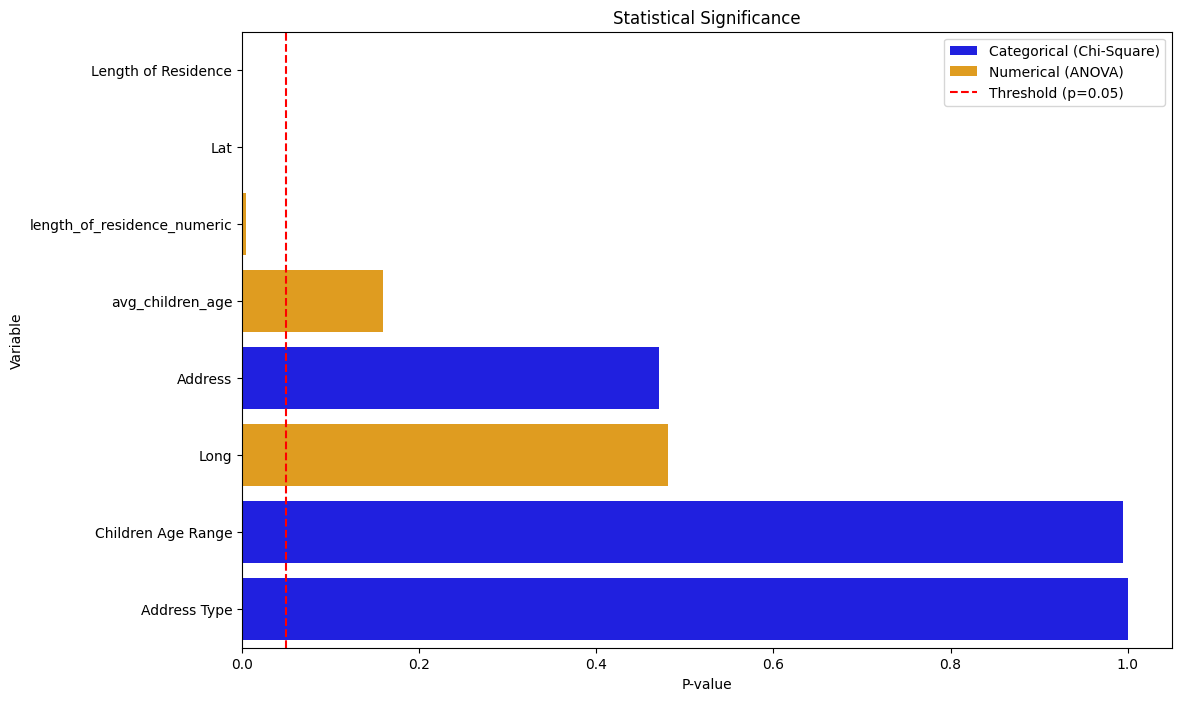

In [60]:
def visualize_statistical_results(categorical_results, numerical_results):
    # Label each set of results.
    categorical_results = categorical_results.copy()
    numerical_results = numerical_results.copy()
    categorical_results["Type"] = "Categorical (Chi-Square)"
    numerical_results["Type"] = "Numerical (ANOVA)"

    # Combine and sort results.
    combined_results = pd.concat([categorical_results, numerical_results], ignore_index=True)
    combined_results = combined_results.sort_values(by="P-value", ascending=True)

    # Create a bar plot.
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x="P-value",
        y="Variable",
        hue="Type",
        data=combined_results,
        dodge=False,
        palette={"Categorical (Chi-Square)": "blue", "Numerical (ANOVA)": "orange"}
    )

    # Draw a vertical threshold line at p=0.05.
    plt.axvline(x=0.05, color="red", linestyle="--", label="Threshold (p=0.05)")
    plt.xlabel("P-value")
    plt.ylabel("Variable")
    plt.title("Statistical Significance")
    plt.legend()
    plt.show()

# Visualize the statistical results.
visualize_statistical_results(categorical_results, numerical_results)

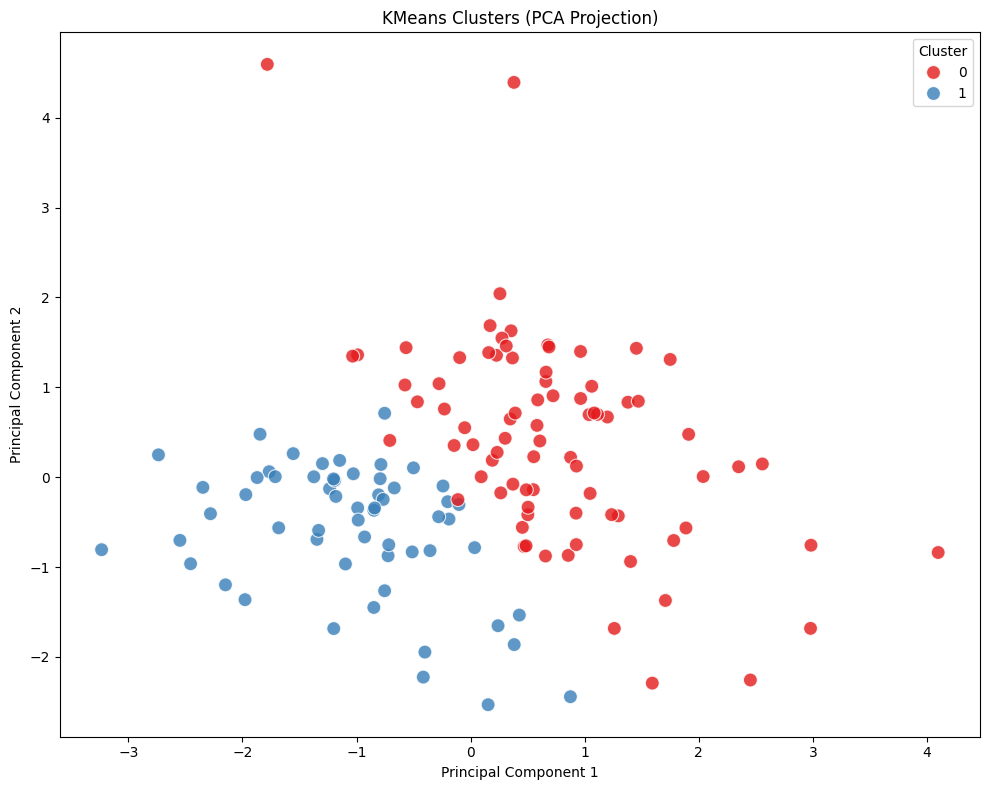

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Define your numerical columns.
numerical_columns = [
    "MAK",
    "MIK",
    "Lat",
    "Long",
    "household_income_numeric",
    "avg_children_age",
    "length_of_residence_numeric"
]

# Subset the DataFrame to numerical columns and drop rows with missing values.
df_numeric = df[numerical_columns].dropna()

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Perform KMeans clustering (example with 3 clusters).
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame.
df_numeric["Cluster"] = clusters

# Optional: Visualize clusters using PCA to reduce dimensions to 2.
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(X_scaled)
df_numeric["PC1"] = pca_results[:, 0]
df_numeric["PC2"] = pca_results[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_numeric, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=100, alpha=0.8)
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


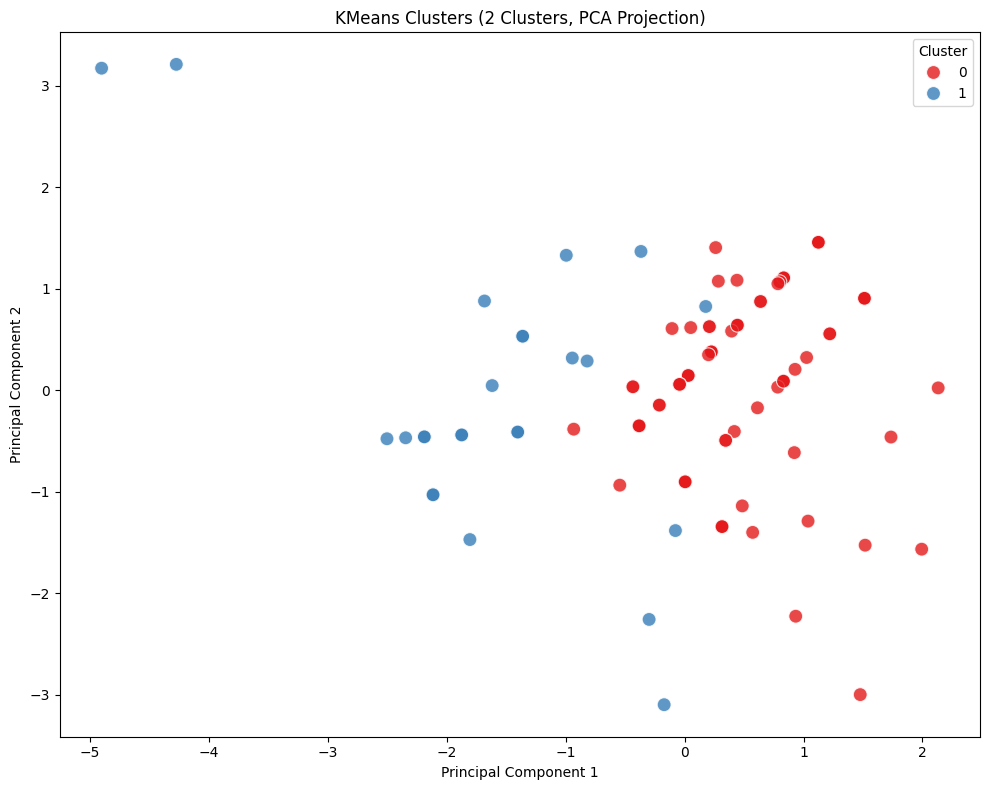

Cluster Means (Averages for All Numerical Variables):
+-----------+-------+---------+----------------------------+--------------------+-------------------------------+
|   Cluster |   Lat |    Long |   household_income_numeric |   avg_children_age |   length_of_residence_numeric |
|-----------+-------+---------+----------------------------+--------------------+-------------------------------|
|         0 | 33.64 | -117.84 |                    60307.5 |              10.65 |                         14.65 |
|         1 | 33.64 | -117.84 |                    66400.5 |              12.69 |                          4.54 |
+-----------+-------+---------+----------------------------+--------------------+-------------------------------+


In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Specify the columns to perform KMeans on.
kmeans_columns = [
    "household_income_numeric",
    "avg_children_age",
    "length_of_residence_numeric"
]

# Specify ALL numerical columns you want to compare (including those not used for clustering).
all_numerical_columns = [
    "Lat",
    "Long",
    "household_income_numeric",
    "avg_children_age",
    "length_of_residence_numeric"
]

# Subset the DataFrame to the clustering columns and drop rows with missing values.
df_cluster = df[kmeans_columns].dropna().copy()

# Scale the data used for clustering.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Perform KMeans clustering with 2 clusters.
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the clustering DataFrame.
df_cluster["Cluster"] = clusters

# Merge the cluster labels back into the original dataset (for the rows used in clustering).
df_with_clusters = df.loc[df_cluster.index].copy()
df_with_clusters["Cluster"] = clusters

# Optional: Visualize the clusters using PCA on the clustering columns.
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(X_scaled)
df_cluster["PC1"] = pca_results[:, 0]
df_cluster["PC2"] = pca_results[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cluster, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=100, alpha=0.8)
plt.title("KMeans Clusters (2 Clusters, PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Compute the averages for all numerical variables by cluster.
cluster_means = df_with_clusters.groupby("Cluster")[all_numerical_columns].mean().reset_index()

# Round the values for a neater presentation
cluster_means = cluster_means.round(2)

# Print the cluster means as a nicely formatted table
print("Cluster Means (Averages for All Numerical Variables):")
print(tabulate(cluster_means, headers="keys", tablefmt="psql", showindex=False))


In [73]:
import pandas as pd
import numpy as np
import folium
from folium import plugins

# --- Define Cluster Centers ---
center1 = (33.639794, -117.838598)
center2 = (33.639008, -117.838645)

# --- Helper Function: Euclidean Distance (for small geographic areas) ---
def euclidean_distance(lat, lon, center):
    return np.sqrt((lat - center[0])**2 + (lon - center[1])**2)

# --- Assign Each Point to the Nearest Cluster Center ---
def assign_cluster(row):
    d1 = euclidean_distance(row["Lat"], row["Long"], center1)
    d2 = euclidean_distance(row["Lat"], row["Long"], center2)
    return 0 if d1 < d2 else 1

# Drop rows with missing lat/long to avoid errors.
df = df.dropna(subset=["Lat", "Long"]).copy()

# Assign a cluster label based on whichever center is closer.
df["Cluster"] = df.apply(assign_cluster, axis=1)

# --- Compute Midpoint and Horizontal Divider ---
mid_lat = (center1[0] + center2[0]) / 2
mid_lon = (center1[1] + center2[1]) / 2
midpoint = (mid_lat, mid_lon)

# Choose how far (in degrees) to extend the horizontal line on each side.
scale = 0.005  # ~0.005° of longitude is roughly 400-500 meters at this latitude.

# Create two endpoints for a purely horizontal line at mid_lat
endpoint1 = (mid_lat, mid_lon - scale)
endpoint2 = (mid_lat, mid_lon + scale)

# --- Create a Folium Map Centered at the Midpoint ---
m = folium.Map(location=midpoint, zoom_start=16)

# Plot all the points with different colors based on their cluster.
colors = {0: "blue", 1: "green"}
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row["Lat"], row["Long"]),
        radius=3,
        color=colors[row["Cluster"]],
        fill=True,
        fill_color=colors[row["Cluster"]],
        fill_opacity=0.7
    ).add_to(m)

# Add markers for the cluster centers.
folium.Marker(location=center1,
              icon=folium.Icon(color="red", icon="info-sign"),
              popup="Center 1").add_to(m)
folium.Marker(location=center2,
              icon=folium.Icon(color="red", icon="info-sign"),
              popup="Center 2").add_to(m)

# Draw the horizontal divider line.
folium.PolyLine(
    locations=[endpoint1, endpoint2],
    color="purple",
    weight=3,
    opacity=0.8,
    popup="Horizontal Divider"
).add_to(m)

# --- Add a Simple Legend Using HTML Overlay ---
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 150px; height: 110px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white;
    ">
    <div style="padding:5px;">
      <b>Legend</b><br>
      <i class="fa fa-circle" style="color:blue"></i> Area 1<br>
      <i class="fa fa-circle" style="color:green"></i> Area 2<br>
      <i class="fa fa-map-marker" style="color:red"></i> Centers<br>
      <i class="fa fa-minus" style="color:purple"></i> Divider
    </div>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Optional: Add a layer control or fullscreen plugin.
folium.LayerControl().add_to(m)
plugins.Fullscreen().add_to(m)

# Show or save the map.
m.save("map_with_horizontal_line_and_legend.html")
m
